In [26]:
import numpy as np
import matplotlib.pyplot as plt
import os
import sys
sys.path.insert(1, os.path.realpath(os.path.pardir))

def gaussian_random_walk(n_steps, mean=0, std=1):
    """
    Generate a Gaussian random walk.

    Parameters:
    - n_steps (int): Number of steps in the random walk.
    - mean (float): Mean of the Gaussian distribution for each step.
    - std (float): Standard deviation of the Gaussian distribution for each step.

    Returns:
    - random_walk (numpy.ndarray): Array containing the random walk values.
    """

    # Generate random Gaussian increments
    increments = np.random.normal(mean, std, n_steps)

    # Compute the cumulative sum to get the random walk path
    random_walk = np.cumsum(increments)

    return random_walk


def gen_x(k: np.ndarray, dt: float = 0.01, tau: float = 0.025, a: float = 1., b: float = 1) -> np.ndarray:
    x = np.zeros_like(k)

    for t in range(1, len(k)):
        in_ = k[t - 1] - x[t - 1]
        x[t] = (a*x[t - 1] + b*in_*dt/tau)

    return x

def gen_r(x: np.ndarray, alpha: float = 5, beta: float = 0.1) -> np.ndarray:
    r = np.zeros_like(x)

    for t in range(1, len(r)):
        r[t] = 1/(1 + np.exp(-2*beta*(x[t] - alpha)))

    return r

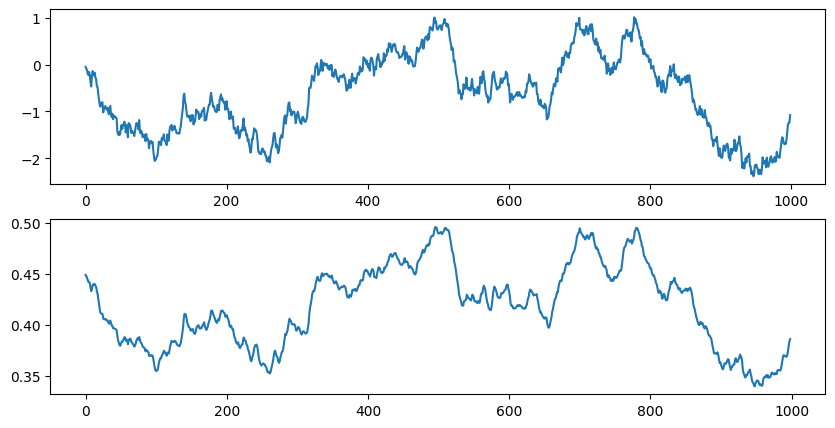

In [49]:
# k = gaussian_random_walk(1000, mean=0, std=0.1)

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 5))

ax1.plot(k)
r = gen_r(gen_x(k), alpha=1, beta=0.1)
ax2.plot(r[1:])

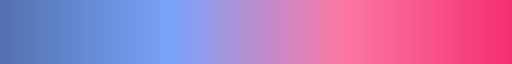

In [50]:
from deepmeg.utils.colors import generate_cmap

cmap = generate_cmap('#5472af', '#79a4fa', '#FA79A4', '#f72f72')
cmap

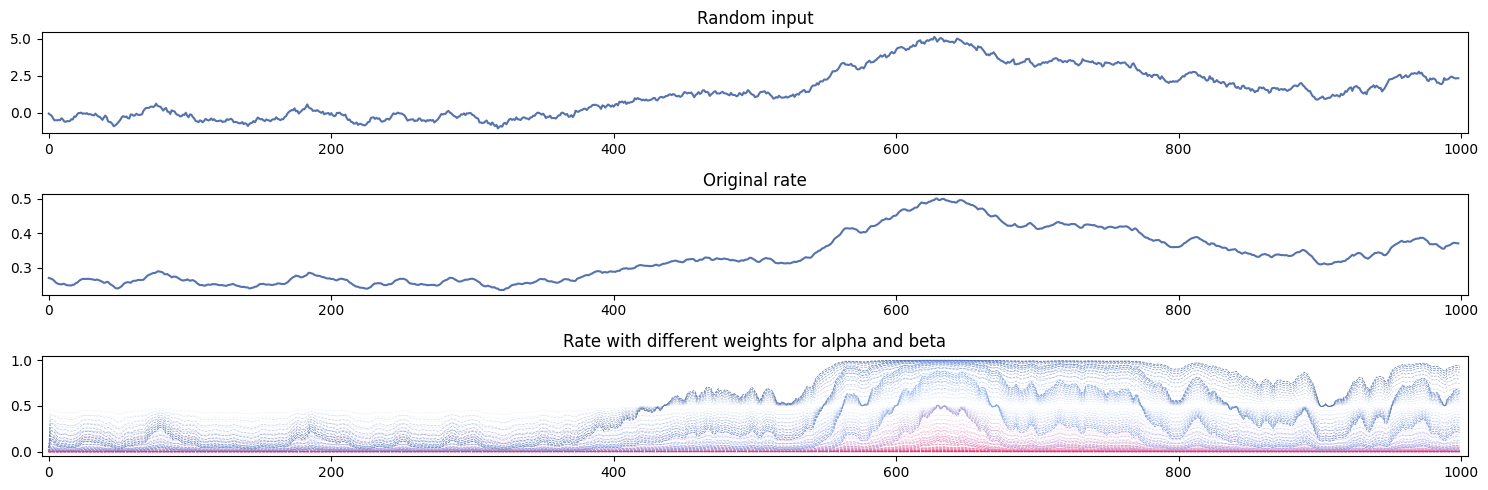

In [66]:
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(15, 5))

# k = gaussian_random_walk(1000, mean=0, std=0.1)

ax1.plot(k[1:], color=cmap(0))
ax1.set_xlim(-5, 1005)
ax1.set_title('Random input')
r = gen_r(gen_x(k, a=1, b=1))
ax2.plot(r[1:], color=cmap(0))
ax2.set_xlim(-5, 1005)
ax2.set_title('Original rate')


n_steps = 10
a_range = np.linspace(0.9, 1, n_steps)
b_range = np.linspace(.5, 2.5, n_steps)

alpha_range = np.linspace(1, 10, n_steps)
beta_range = np.linspace(.1, 1, n_steps)

alphas = np.linspace(0.1, 1, n_steps)
colors = [cmap(a) for a in np.linspace(0., 1, n_steps)]

for a, c in zip(alpha_range, colors):
    for b, alpha in zip(beta_range, alphas):
        color = c
        # r = gen_r(gen_x(k, a=a, b=b))
        r = gen_r(gen_x(k), a, b)
        ax3.plot(r, c=color, alpha=alpha, linestyle='--', linewidth=0.5)
ax3.set_xlim(-5, 1005)
# ax3.set_title(r'Rate with different weights for $x_{t}$ and $k_{t}$')

ax3.set_title(r'Rate with different weights for alpha and beta')
fig.tight_layout()

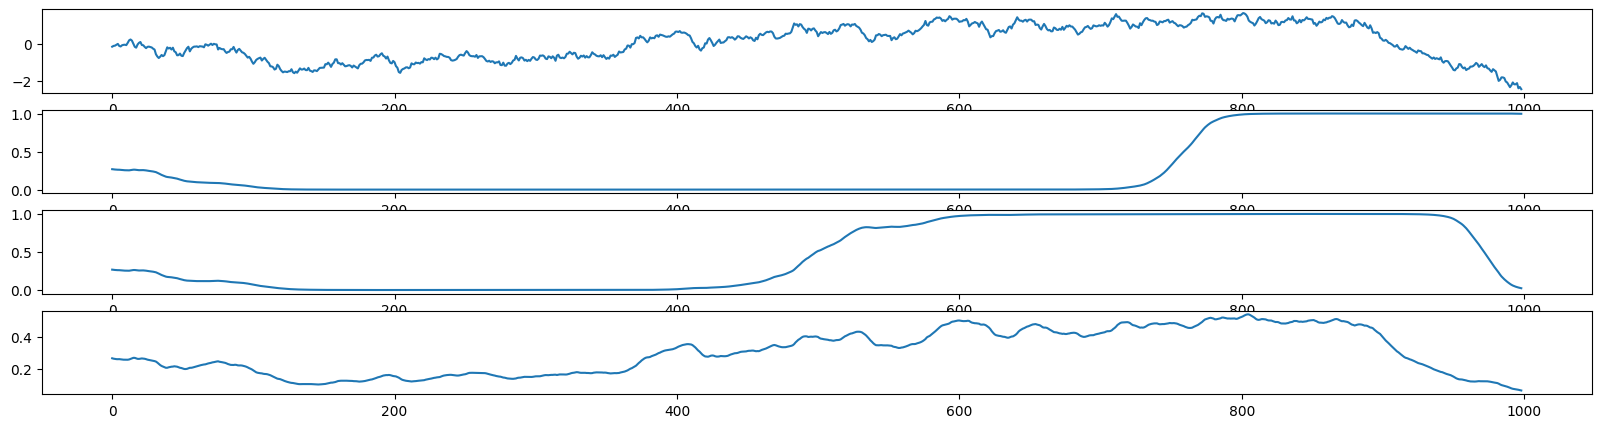

In [51]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(20, 5))
# k = gaussian_random_walk(1000, mean=0, std=0.1)
ax1.plot(k[1:])
r = gen_r(gen_x(k, a=1, b=1))
ax2.plot(r[1:])
r = gen_r(gen_x(k, a=.99, b=1))
ax3.plot(r[1:])
r = gen_r(gen_x(k, a=.9, b=1))
ax4.plot(r[1:])

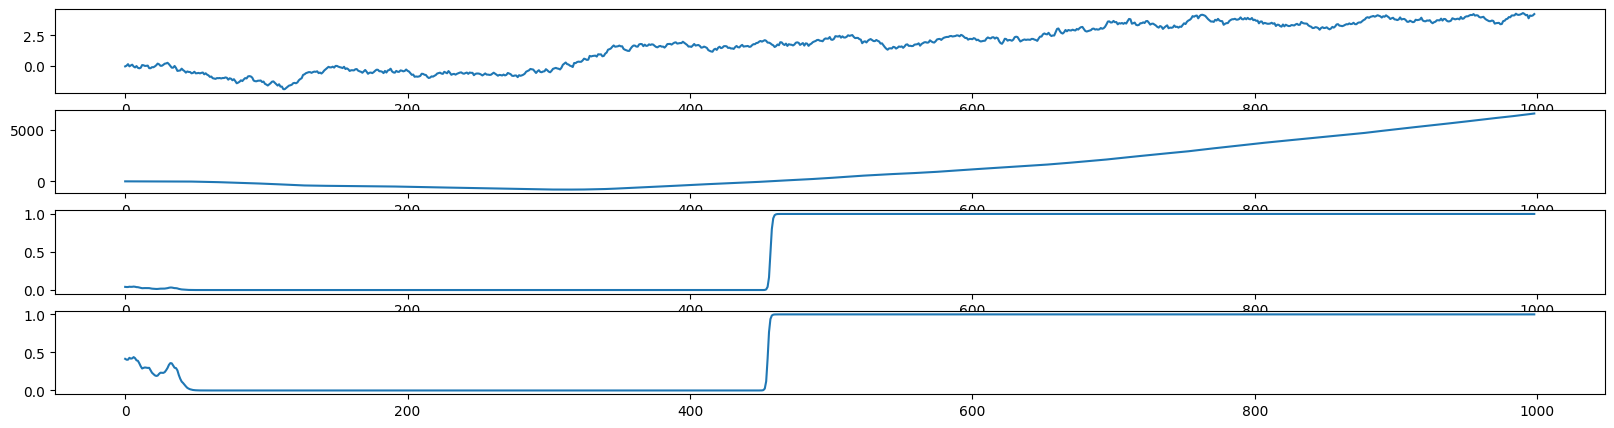

In [15]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(20, 5))

ax1.plot(k[1:])
r = gen_r(gen_x(k, a=1, b=1), alpha=5, beta=0.1)
r = gen_x(k, a=1, b=1)
ax2.plot(r[1:])
r = gen_r(gen_x(k, a=1, b=1), alpha=15, beta=0.1)
ax3.plot(r[1:])
r = gen_r(gen_x(k, a=1, b=1), alpha=1, beta=0.1)
ax4.plot(r[1:])

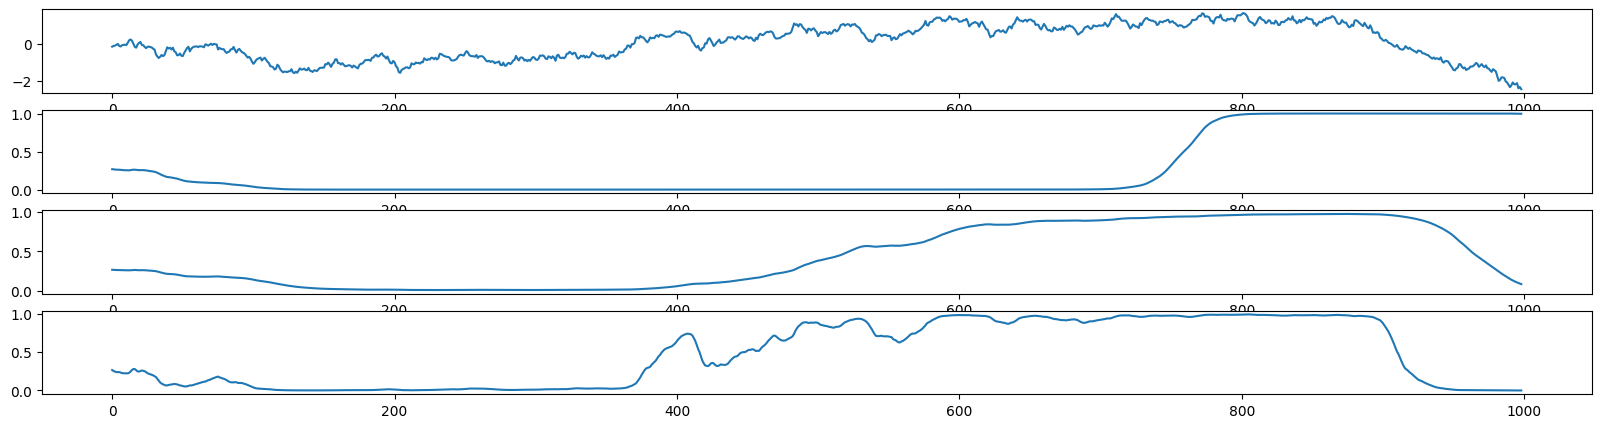

In [57]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(20, 5))

ax1.plot(k[1:])
r = gen_r(gen_x(k, a=1, b=1))
ax2.plot(r[1:])
r = gen_r(gen_x(k, a=.99, b=.5))
ax3.plot(r[1:])
r = gen_r(gen_x(k, a=.9, b=5))
ax4.plot(r[1:])

/tmp/ipykernel_7561/3533660306.py:41: RuntimeWarning: overflow encountered in exp
  r[t] = 1/(1 + np.exp(-2*beta*(x[t] - alpha)))
/tmp/ipykernel_7561/3533660306.py:33: RuntimeWarning: overflow encountered in scalar multiply
  x[t] = (a*x[t - 1] + b*k[t - 1]*dt/tau)


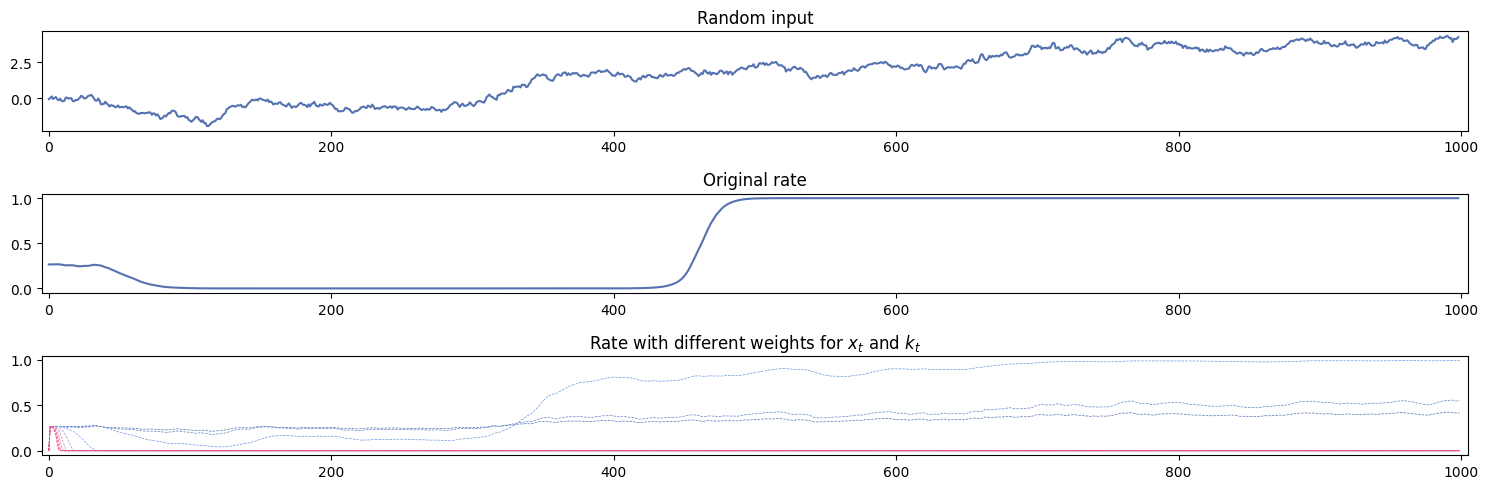

In [10]:
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(15, 5))

k = gaussian_random_walk(1000, mean=0, std=0.1)

ax1.plot(k[1:], color=cmap(0))
ax1.set_xlim(-5, 1005)
ax1.set_title('Random input')
r = gen_r(gen_x(k, a=1, b=1))
ax2.plot(r[1:], color=cmap(0))
ax2.set_xlim(-5, 1005)
ax2.set_title('Original rate')


n_steps = 10
a_range = np.linspace(0.9, 1, n_steps)
b_range = np.linspace(.5, 2.5, n_steps)
alphas = np.linspace(0.1, 1, n_steps)
colors = [cmap(a) for a in np.linspace(0., 1, n_steps)]

for a, c in zip(b_range, colors):
    color = c
    r = gen_r(gen_x(k, a=a, b=1))
    ax3.plot(r, c=color, linestyle='--', linewidth=0.5)
ax3.set_xlim(-5, 1005)
ax3.set_title(r'Rate with different weights for $x_{t}$ and $k_{t}$')
fig.tight_layout()

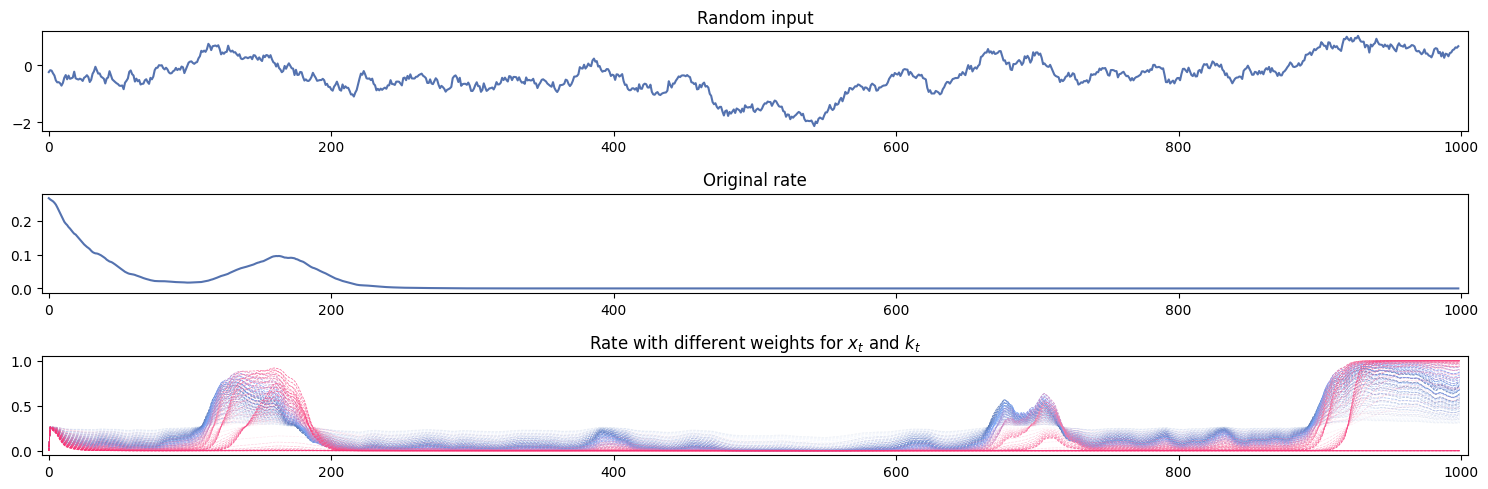

In [46]:
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(15, 5))

# k = gaussian_random_walk(1000, mean=0, std=0.1)

ax1.plot(k[1:], color=cmap(0))
ax1.set_xlim(-5, 1005)
ax1.set_title('Random input')
r = gen_r(gen_x(k, a=1, b=1))
ax2.plot(r[1:], color=cmap(0))
ax2.set_xlim(-5, 1005)
ax2.set_title('Original rate')


n_steps = 10
a_range = np.linspace(0.9, 1, n_steps)
b_range = np.linspace(.5, 5, n_steps)
alphas = np.linspace(0.1, 1, n_steps)
colors = [cmap(a) for a in np.linspace(0., 1, n_steps)]

for a, c in zip(a_range, colors):
    for b, alpha in zip(b_range, alphas):
        color = c
        r = gen_r(gen_x(k, a=a, b=b))
        ax3.plot(r, c=color, alpha=alpha, linestyle='--', linewidth=0.5)
ax3.set_xlim(-5, 1005)
ax3.set_title(r'Rate with different weights for $x_{t}$ and $k_{t}$')
fig.tight_layout()

In [45]:
b_range = np.logspace(*np.log10([0.5, 5]), n_steps)

In [4]:
params = {
    'alpha_value': 5,
    'beta_value': 0.1,
    'alpha_IP': 50,
    'beta_IP': 0.1,
    'phi_PWb-TR': 50,
    'phi_TR-PWb': 35,
    'phi_TR-BVC': 30,
    'phi_BVC-TR': 45,
    'phi_HD-HD': 15,
    'phi_HD-IP': 10,
    'phi_HD-TR': 15,
    'phi_HDrot': 2,
    'phi_IP-TR': 90,
    'phi_PC-PC': 25,
    'phi_PC-BVC': 1100,
    'phi_PC-PRb': 6000,
    'phi_BVC-PC': 440,
    'phi_BVC-PRb': 75,
    'phi_PRb-PC': 25,
    'phi_PRb-BVC': 1,
    'phi_GC-PC': 3,
    'phi_PWo-TR': 60,
    'phi_TR-PWo': 30,
    'phi_TR-OVC': 60,
    'phi_OVC-TR': 30,
    'phi_PC-OVC': 1.7,
    'phi_PRo-OVC': 6,
    'phi_PC-PRo': 1,
    'phi_OVC-PC': 5,
    'phi_OVC-oPR': 5,
    'phi_PRo-PC': 100,
    'phi_PRo-PRo': 115,
    'phi_inh-PC': 0.4,
    'phi_inh-BVC': 0.2,
    'phi_inh-PRb': 9,
    'phi_inh-PRo': 1,
    'phi_inh-HD': 0.4,
    'phi_inh-TR': 0.075,
    'phi_inh-TRo': 0.1,
    'phi_inh-PW': 0.1,
    'phi_inh-OVC': 0.5,
    'phi_inh-PWo': 1,
    'PHI_PC-PC': 0.4,
    'PHI_BVC-BVC': 0.2,
    'PHI_PR-PR': 9,
    'PHI_HD-HD': 0.4,
    'PHI_OVC-OVC': 0.5,
    'PHI_PRo-PRo': 0.1,
    'PW_bath': 0.2,
    'TR_bath': 0.088,
    'Object_enc_threshold': 18,
    'Object_enc_Threshold_(3.1)': 36,
    'l_GC-resPC': 65000.0,
    'l_resPC-BVC': 65000.0,
    'l_BVC-resPC': 65000.0,
    'S_GC-resPC': 0.03,
    'S_resPC-resPC': 0.06,
    'Sigma_(r_+_8)_*_s0': lambda r, s0: (r + 8) * s0,
    'Sigma_0': 0.08,
    'Sigma_teta': 0.2236,
    'N_PC': (44, 44),
    'N_BVC': (16, 51),
    'N_TRb/o': (20, 16, 51),
    'N_OVC': (16, 51),
    'N_PRb/o': 'Dependent on simulation environment',
    'N_PWb/o': (16, 51),
    'N_IP': 1,
    'N_HD': 100,
    'N_GC_per_module': 100,
    'N_reservoir': 437
}

In [54]:
def gen_x(n_times: int, n_neurons: int = 10, dt: float = 0.01, tau: float = 0.025, a: float = 1., b: float = 1) -> np.ndarray:
    x = np.zeros((n_times, n_neurons, 1))
    r = np.zeros((n_times, n_neurons, 1))
    w = np.random.randn(n_neurons, 1)

    for t in range(1, x.shape[0]):
        r[t-1] = np.expand_dims(next_r(x[t-1, :, 0]), 1)
        x[t] = (a*x[t - 1] + b*(-x[t-1] + 25*(w@w.T)@r[t-1])*dt/tau)

    r[t] = np.expand_dims(next_r(x[t, :, 0]), 1)

    return x, r

def next_r(x: np.ndarray, alpha: float = 5, beta: float = 0.1) -> np.ndarray:
    r = 1/(1 + np.exp(-2*beta*(x - alpha)))

    return r


In [56]:
r.shape

(1000, 10, 1)

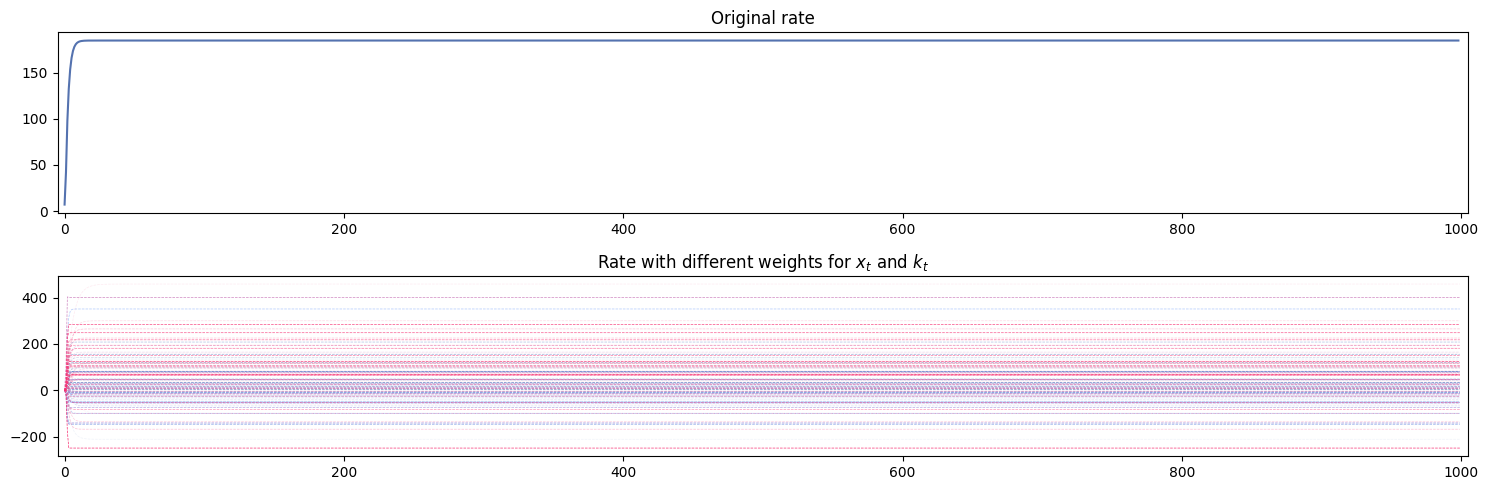

In [67]:
fig, (ax2, ax3) = plt.subplots(2, 1, figsize=(15, 5))


n_times = 1000

# r = gen_r(gen_x(k, a=1, b=1))
r, x = gen_x(n_times)
r = r[:, 0, 0]
ax2.plot(r[1:], color=cmap(0))
ax2.set_xlim(-5, 1005)
ax2.set_title('Original rate')


n_steps = 10
a_range = np.linspace(0.9, 1, n_steps)
b_range = np.linspace(.5, 2.5, n_steps)
alphas = np.linspace(0.1, 1, n_steps)
colors = [cmap(a) for a in np.linspace(0., 1, n_steps)]

for a, c in zip(a_range, colors):
    for b, alpha in zip(b_range, alphas):
        color = c
        # r = gen_r(gen_x(k, a=a, b=b))
        r, x = gen_x(n_times, a=a, b=b)
        r = r[:, 0, 0]
        ax3.plot(r, c=color, alpha=alpha, linestyle='--', linewidth=0.5)
ax3.set_xlim(-5, 1005)
ax3.set_title(r'Rate with different weights for $x_{t}$ and $k_{t}$')
fig.tight_layout()